# Titanic Dataset

In [ ]:
! pip install bqplot
! pip install pingouin
! pip install chart_studio

In [ ]:
import pandas                  as pd
from   scipy import stats
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
import chart_studio.plotly     as py

# https://community.plot.ly/t/solved-update-to-plotly-4-0-0-broke-application/26526/2
import os

#%matplotlib inline
#plt.style.use('ggplot')
from bokeh.resources import INLINE
import bokeh.io
from bokeh import *
import pingouin
bokeh.io.output_notebook(INLINE)

#Montar la unidad en drive
# from google.colab import drive
# import os

# drive.mount('/content/gdrive')

# # Establecer ruta de acceso en drive
# import os
# print(os.getcwd())
# os.chdir("/content/gdrive/My Drive")

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


In [ ]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

df = pd.read_csv(url)

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df['Age'].isnull().sum()
df['Age'].describe()

# atípicos = mediana
# homogeneos = media
# categoricos = moda

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Boxplot de la Edad en el titanic')

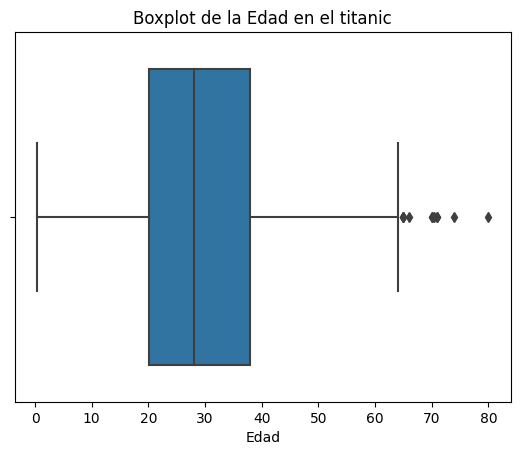

In [ ]:
#Crear boxplot de la columna age para identificar outliers
sns.boxplot(data=df, x='Age')

plt.xlabel('Edad')
plt.title('Boxplot de la Edad en el titanic')


Text(0.5, 1.0, 'Boxplot de la Edad en el titanic sin NAN')

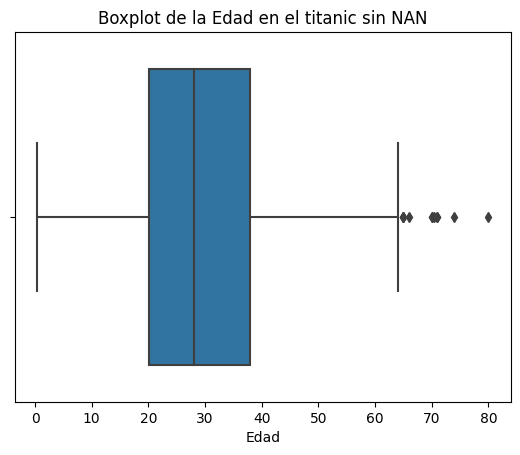

In [ ]:
#Boxplot sin NAN
df_clean = df.dropna(subset=['Age'])

sns.boxplot(data=df_clean, x='Age')

plt.xlabel('Edad')
plt.title('Boxplot de la Edad en el titanic sin NAN')


In [ ]:
#Obtenemos la mediana de age
median_age = df['Age'].median()

df['Age'].fillna(median_age, inplace=True)

#Verificar los Nan
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
#Eliminar columna Cabin ya que la podemos asociar con la columna de Fare (Tarifa)
df.drop(["Cabin"],axis=1,inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [ ]:
# Reemplaza los valores NaN en la columna 'Embarked' por la moda
mode_embarked= df["Embarked"].mode()[0]

df['Embarked'].fillna(mode_embarked, inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# 4. Análisis Exploratorio de datos (EDA)

## Objetos Visuales

In [ ]:
#Contabilizar cantidad de pasajeros por género
print(df['Sex'].value_counts())

male      577
female    314
Name: Sex, dtype: int64


In [ ]:
#Filtrar por sobrevivientes
df_survived =df[df["Survived"] == 1]
df_survived.head()

df_survived = df.query('Survived == 1')

df_survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S


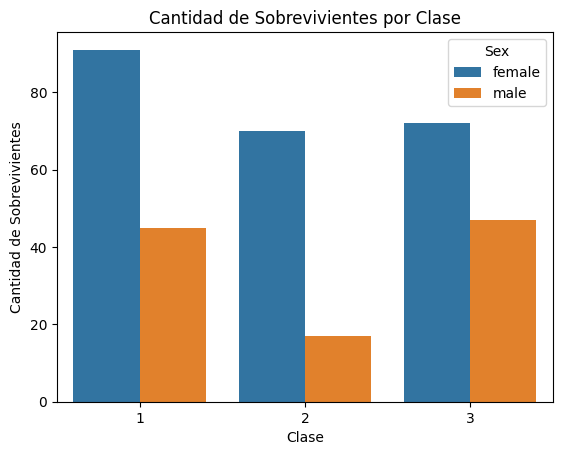

In [ ]:
#Crear un countplot de sobrevivientes por Pclass y por Sex

sns.countplot(x="Pclass", data =df_survived, hue = "Sex")

#Contextualizando el gráfico
plt.title('Cantidad de Sobrevivientes por Clase')
plt.xlabel('Clase')
plt.ylabel('Cantidad de Sobrevivientes')
plt.show()

#5. Selección de variables

In [ ]:
#Eliminar las columnas irrelevantes Passenger ID, Name, Ticket
df.drop(["PassengerId","Name", "Ticket"],axis=1,inplace=True) #axis = 1 columnas, inplace = True dentro del df
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
# Definir el mapeo de valores categóricos a valores numéricos deseados
print("Valores únicos columna Sex:", df['Sex'].unique())
print("Valores únicos columna Emarked:", df['Embarked'].unique())

Valores únicos columna Sex: ['male' 'female']
Valores únicos columna Emarked: ['S' 'C' 'Q']


In [ ]:
#Definir clave valor sex
custom_mapping_sex = {
    'male': 0,
    'female': 1
}

#Definir clave valor embarcación
custom_mapping_embarked = {
    'S': 2,
    'C': 0,
    'Q': 1
}

# Aplicar la transformación con el mapeo personalizado
df['Sex'] = df['Sex'].map(custom_mapping_sex)

df['Embarked'] = df['Embarked'].map(custom_mapping_embarked)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2
1,1,1,1,38.0,1,0,71.2833,0
2,1,3,1,26.0,0,0,7.9250,2
3,1,1,1,35.0,1,0,53.1000,2
4,0,3,0,35.0,0,0,8.0500,2


#6. Modelamiento

* Acuerdate del triunvirato (build, fit, predict)
* Gini es una medida de impureza de los datos.
* Si el Gini es cero entonces es mejor porque los datos son
* Si Gini es 1 entonces el clasificador es heterogeneo y la clasificación no es correcta porque hay bastante impureza en los datos


In [ ]:
df.shape

(891, 8)

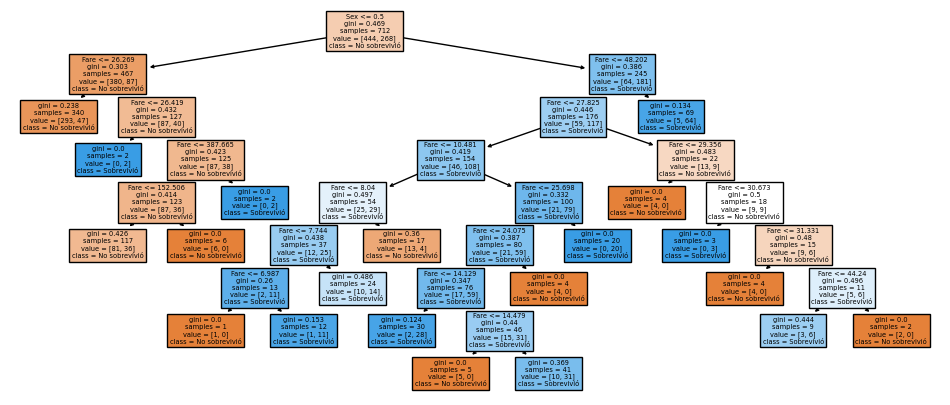

Rendimiento del árbol de decisión con 5 nodos: 0.80


In [ ]:

#Paso 1: Dividimos el dataset en entrenamiento y prueba.
columnas_variables = ['Sex', 'Fare']
X = df[columnas_variables]
y = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Triunvirato build, fit, predict
#Paso 2 Crear modelo
clf = DecisionTreeClassifier(max_leaf_nodes=20)

#Paso 3 = Ajuste del modelo
clf.fit(x_train, y_train)

#Paso 4: Visualizar árbol de decisión
plt.figure(figsize=(12, 5))
plot_tree(clf, feature_names=X.columns, class_names=['No sobrevivió', 'Sobrevivió'], filled=True)
plt.show()

#Paso 5: Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(x_test)

#Paso 6: Evaluar el rendimiento del árbol de decisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Rendimiento del árbol de decisión con 5 nodos: {accuracy:.2f}')

# Modelo 2. K Nearest Neighbors (KNN)

In [ ]:
#1. Seleccción de variables: Definir variables independientes y variable objetivo
columnas_variables = ['Sex']
X = df[columnas_variables]
y = df['Survived']

#Paso 2 Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Paso 3: Escalar los datos para normalizarlos, estandarizarlos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Paso 4: Crear el modelo K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)

#Paso 5: Entrenar el modelo con los datos de entrenamiento
knn_model.fit(X_train_scaled, y_train) #Con x datos normalizados

#Paso 6: Realizar predicciones en el conjunto de prueba
y_pred = knn_model.predict(X_test_scaled)

# Paso 7: Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Rendimiento del modelo K-Nearest Neighbors: {accuracy:.2f}')

Rendimiento del modelo K-Nearest Neighbors: 0.78


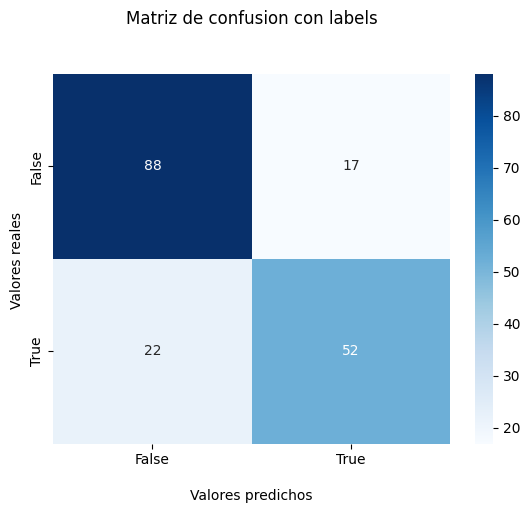

Matriz de Confusión:
[[88 17]
 [22 52]]


In [ ]:
#Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

#Visualización de la matriz
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Matriz de confusion con labels\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
## Ticket labels - En orden alfabetico
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()
print('Matriz de Confusión:')
print(cm)

*   Verdaderos Positivos  (TP) : el modelo ha clasificado correctamente 54 instancias.
*   Falsos negativos (FN) : el modelo a clasificado 20 instancias como no sobrevivió cuando en realidad era sobrevivió.
*   Falsos positivos (FP) = 15: El modelo ha clasificado incorrectamente 15 instancias como 'Sobrevivió' cuando en realidad eran 'No sobrevivió'.
Verdaderos negativos (TN) = 90: El modelo ha clasificado correctamente 90 instancias como 'No sobrevivió'.

# Regresión logística

In [ ]:
#Paso 1: definir variables
X = df.drop('Survived', axis=1)
y = df['Survived']

#Paso 2: Dividir conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Paso 3: Modelo regresión de regresión logística
logistic_model = LogisticRegression()
#Paso 4:  Entrenar el modelo con los datos de entrenamiento
logistic_model.fit(X_train, y_train)

# Paso 5: Realizar predicciones en el conjunto de prueba
y_pred = logistic_model.predict(X_test)

#Paso 6: Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Rendimiento del modelo de Regresión Logística: {accuracy:.2f}')

Rendimiento del modelo de Regresión Logística: 0.81


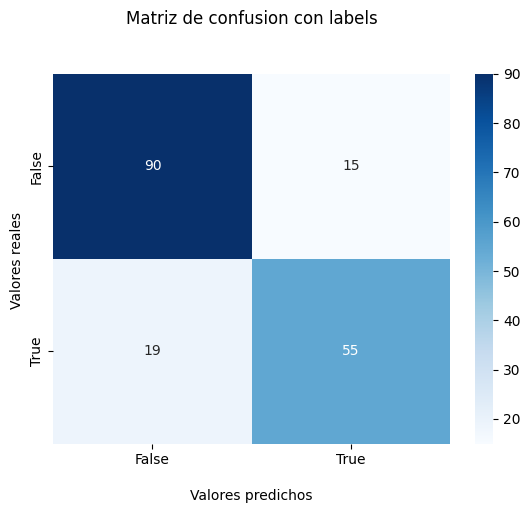

Matriz de Confusión:
[[90 15]
 [19 55]]


In [ ]:
#Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

#Visualización de la matriz
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Matriz de confusion con labels\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
## Ticket labels - En orden alfabetico
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()
print('Matriz de Confusión:')
print(cm)